In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from scipy.integrate import ode 
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from numpy import tan as tan
from scipy.interpolate import interp1d as sp_interp1d
from astropy import constants as const
from astropy import units as u
import math
from math import radians as radian
from numpy import linalg as LA
from scipy.special import ellipj
from numpy import e as e
import scipy.integrate as integrate
from scipy.optimize import fsolve
from scipy.integrate import quad, dblquad
from scipy.interpolate import splev, splrep
'''customize the plot '''
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.close()

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
kb=const.k_B.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value
e=const.e.esu.value
me=const.m_e.cgs.value
mp=const.m_p.cgs.value

In [2]:
def raytracing(theta_em):
    
    x=sin(theta_em)
    M=1.4*Ms
    R=10*km
    Rs=2*G*M/c**2
    ratio=Rs/R
    def integrand(u):
        return x * ((1-ratio)*(ratio/2)**2 -(1-2*u) * u**2 * x**2 ) ** (-0.5)
    sol=quad(integrand, 0, 0.5*ratio)
    return sol[0]

def raytracing1(theta_em):
    
    M=1.4*Ms
    R=10*km
    Rs=2*G*M/c**2
    ratio=Rs/R
    sol=np.arccos((cos(theta_em)-ratio)/(1-ratio))
    return sol

xx1=np.linspace(0,pi/2,2000)
yy1=np.zeros(xx1.size)
for i in range(xx1.size):
    yy1[i]=raytracing(xx1[i])
    
th2te=sp_interp1d(yy1, xx1,fill_value=(0, pi/2),bounds_error=False)

0.13122369006642876
19467.772867207477
11329.42690699577
9321.367554092692
8170.588792525465


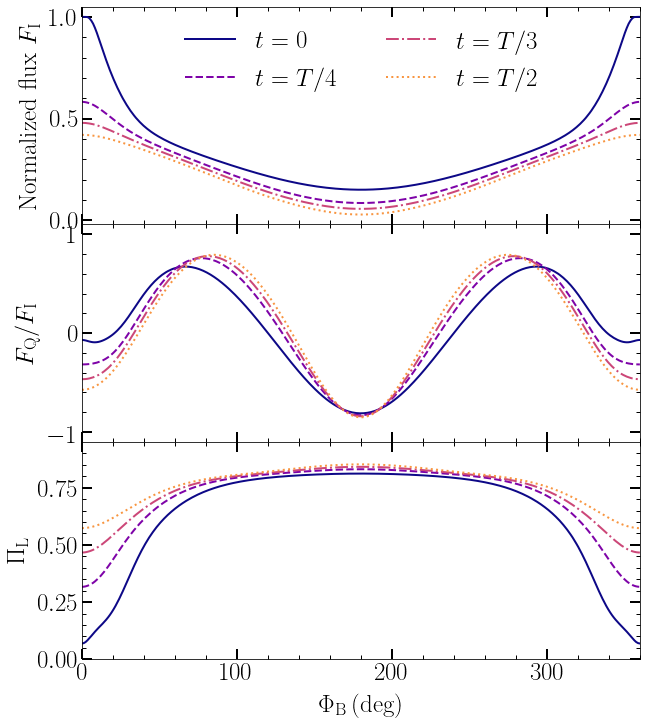

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter

def magnetic_inclination(t, theta, T, P, chi):

    psi=-2*pi/T*t+pi/2
    return np.arccos(np.sin(theta)*np.sin(psi)*np.sin(chi)+np.cos(theta)*np.cos(chi))

epsilon=5e-7
P=2
chi=65/180*pi
theta=15/180*pi
T=P/epsilon/np.cos(theta)
print(T/yr)
t=np.array([0,T/4,T/3,T/2])
alpha1=np.zeros(len(t))   
for i in range(len(t)):
    alpha1[i]=magnetic_inclination(t[i],theta,T,P,chi)

name=['B4131kev','B4133kev','B4135kev']
colors=['red','blue','green']
line=['solid','dashed','dashdot','dotted']
label=[r'$t=0$',r'$t=T/4$',r'$t=T/3$',r'$t=T/2$']


p=plt.get_cmap('plasma')
fig,axs =plt.subplots(3,1, figsize=(10,12), gridspec_kw={'height_ratios': [1, 1,1]},sharex=True,sharey='row')
plt.subplots_adjust(hspace=0.0)


for j in range(len(alpha1)):
    data=np.genfromtxt('./B143kev.dat')
    
    theta_em=data[:,0]
    Ix=data[:,1]
    Io=data[:,2]
    
    Xmode=sp_interp1d(theta_em, Ix,fill_value=(Ix[0], 0),bounds_error=False)
    Omode=sp_interp1d(theta_em, Io,fill_value=(Io[0], 0),bounds_error=False)
    
    alpha=alpha1[j]
    i=radian(45)
    P=2
    omega=2*pi/P
    t=np.linspace(0,2,300)
    Phi=omega*t
    cosTheta=cos(i)*cos(alpha)+sin(i)*sin(alpha)*cos(Phi)
    Theta=np.arccos(cosTheta)
    theta=th2te(Theta)
    Ix1=np.zeros(theta.size)
    Io1=np.zeros(theta.size)
    
    for i in range(len(theta)):
        Ix1[i]=Xmode(theta[i])*cos(theta[i])
        Io1[i]=Omode(theta[i])*cos(theta[i])
        
    Psi=np.arctan2(sin(alpha)*sin(Phi), (-sin(i)*cos(alpha)+cos(i)*sin(alpha)*cos(Phi)))
    
    FI=(Ix1+Io1)
    print(max(FI))

    
    normal1=19467.772867207477
    
    FQ=(Io1-Ix1)*cos(2*Psi)
    
    FU=(Io1-Ix1)*sin(2*Psi)
    
    PL=(FQ**2+FU**2)**0.5/FI
    
    axs[0].plot(Phi/pi*180,FI/normal1,linewidth=2,color=p(j/4),linestyle=line[j],label=label[j])
    axs[1].plot(Phi/pi*180,FQ/FI,linewidth=2,color=p(j/4),linestyle=line[j])
    axs[2].plot(Phi/pi*180,(FQ**2+FU**2)**(0.5)/FI,color=p(j/4),linestyle=line[j],linewidth=2)
#     axs[2].plot(Phi/pi*180,FU/FI)

axs[0].legend(fontsize=25,frameon=False,ncol=2)
axs[0].set_ylabel(r'${\rm Normalized\ flux}\ F_{\rm I}$',fontsize=25)
axs[1].set_ylabel(r'$ F_{\rm Q}/F_{\rm I}$',fontsize=25)
axs[2].set_ylabel(r'$ \Pi_{\rm L}$',fontsize=25)
axs[2].set_xlabel(r'$\Phi_{\rm B}\,(\rm deg)$',fontsize=25)
axs[0].set_xlim(0,360)
axs[0].minorticks_on()
axs[1].set_ylim(-1.1,1.1)
axs[1].minorticks_on()
axs[2].set_ylim(0,0.95)
axs[2].minorticks_on()
# axs[2].set_xlabel(r'$\Phi_{\rm B}\,(\rm deg)$',fontsize=25) 
# fig.text(0.17, 0.9, r'$B=4\times 10^{13}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25) 
# fig.text(0.60, 0.9, r'$B=10^{14}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25)

plt.savefig("../../paper/fig_stokes2.pdf", format='pdf', bbox_inches="tight")

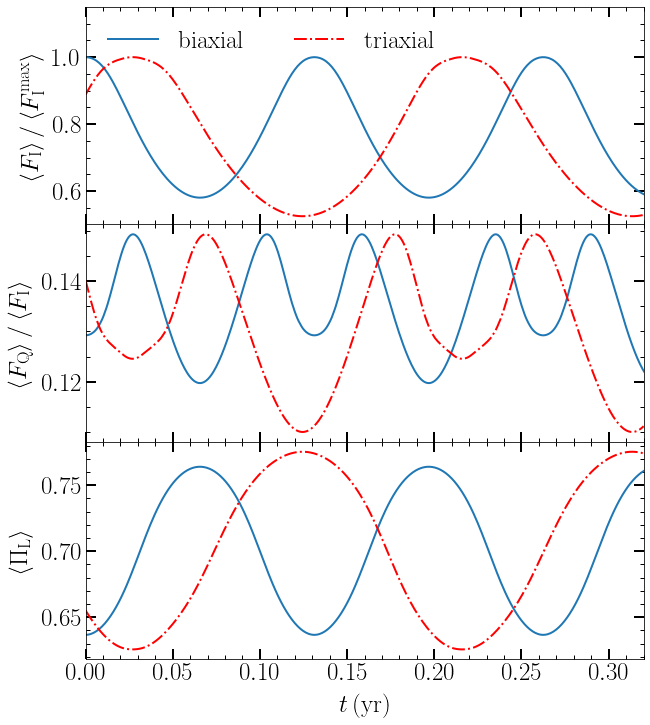

In [116]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter

def magnetic_inclination(t, theta, T, P, chi):

    psi=-2*pi/T*t+pi/2
    return np.arccos(np.sin(theta)*np.sin(psi)*np.sin(chi)+np.cos(theta)*np.cos(chi))

colors=['red','blue','green']
line=['solid','dashed','dashdot','dotted']
label=[r'$t=0$',r'$t=T/4$',r'$t=T/3$',r'$t=T/2$']





for j in range(1):
    data=np.genfromtxt('./B143kev.dat')
    
    
    epsilon=5e-7
    P=2
    chi=65/180*pi
    theta=15/180*pi
    T=P/epsilon/np.cos(theta)
    t1=np.linspace(0,3*T,500)
    alpha1=np.zeros(len(t1))   
    for i in range(len(t1)):
        alpha1[i]=magnetic_inclination(t1[i],theta,T,P,chi)
    
    theta_em=data[:,0]
    Ix=data[:,1]
    Io=data[:,2]
    
    Xmode=sp_interp1d(theta_em, Ix,fill_value=(Ix[0], 0),bounds_error=False)
    Omode=sp_interp1d(theta_em, Io,fill_value=(Io[0], 0),bounds_error=False)
    FAI=np.zeros(len(alpha1))
    FAQ=np.zeros(len(alpha1))
    FAU=np.zeros(len(alpha1))
    PAL=np.zeros(len(alpha1))
    
    for k in range(len(alpha1)):
    
        alpha=alpha1[k]
        i=radian(45)
        P=2
        omega=2*pi/P
        t=np.linspace(0,2,300)
        Phi=omega*t
        cosTheta=cos(i)*cos(alpha)+sin(i)*sin(alpha)*cos(Phi)
        Theta=np.arccos(cosTheta)
        theta=th2te(Theta)
        Ix1=np.zeros(theta.size)
        Io1=np.zeros(theta.size)
        
        for i in range(len(theta)):
            Ix1[i]=Xmode(theta[i])*cos(theta[i])
            Io1[i]=Omode(theta[i])*cos(theta[i])
            
        Psi=np.arctan2(sin(alpha)*sin(Phi), (-sin(i)*cos(alpha)+cos(i)*sin(alpha)*cos(Phi)))
        
        FI=(Ix1+Io1)
        
        FQ=(Io1-Ix1)*cos(2*Psi)
        
        FU=(Io1-Ix1)*sin(2*Psi)
        
        PL=(FQ**2+FU**2)**0.5/FI
        
        FAI[k]=integrate.simpson(FI, Phi)/2/pi
        FAQ[k]=integrate.simpson(FQ, Phi)/2/pi
        FAU[k]=integrate.simpson(FU, Phi)/2/pi
        PAL[k]=integrate.simpson(PL, Phi)/2/pi
        
        
    p=plt.get_cmap('plasma')
    fig,axs =plt.subplots(3,1, figsize=(10,12), gridspec_kw={'height_ratios': [1, 1,1]},sharex=True,sharey='row')
    plt.subplots_adjust(hspace=0.0)       
    axs[0].plot(t1/yr,FAI/max(FAI),linewidth=2,label=r'$\rm biaxial$')
    axs[1].plot(t1/yr,FAQ/FAI,linewidth=2)
    axs[2].plot(t1/yr,PAL,linewidth=2)
#     axs[2].plot(Phi/pi*180,FU/FI)

# axs[0].legend(fontsize=25,frameon=False,ncol=2)
axs[0].set_ylabel(r'$\left \langle F_{\rm I}  \right \rangle/ \left \langle F_{\rm I}^{\rm max}  \right \rangle$',fontsize=25)
axs[1].set_ylabel(r'$ \left \langle F_{\rm Q} \right \rangle / \left \langle F_{\rm I} \right \rangle$',fontsize=25)
axs[2].set_ylabel(r'$ \left \langle \Pi_{\rm L} \right \rangle$',fontsize=25)
axs[2].set_xlabel(r'$t\,(\rm yr)$',fontsize=25)
axs[0].set_xlim(0,0.32)
axs[0].minorticks_on()
# axs[1].set_ylim(-1.1,1.1)
axs[1].minorticks_on()
# axs[2].set_ylim(0,0.95)
axs[2].minorticks_on()
# axs[2].set_xlabel(r'$\Phi_{\rm B}\,(\rm deg)$',fontsize=25) 
# fig.text(0.17, 0.9, r'$B=4\times 10^{13}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25) 
# fig.text(0.60, 0.9, r'$B=10^{14}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25)

# plt.savefig("../../paper/fig_stokes3.pdf", format='pdf', bbox_inches="tight")


for j in range(1):
    data=np.genfromtxt('./B143kev.dat')
    
    theta_em=data[:,0]
    Ix=data[:,1]
    Io=data[:,2]
    
    data1=np.genfromtxt('./triaxial_alpha1.dat')
    t1=data1[:,0]
    alpha1=data1[:,1]
    
    Xmode=sp_interp1d(theta_em, Ix,fill_value=(Ix[0], 0),bounds_error=False)
    Omode=sp_interp1d(theta_em, Io,fill_value=(Io[0], 0),bounds_error=False)
    FAI=np.zeros(len(alpha1))
    FAQ=np.zeros(len(alpha1))
    FAU=np.zeros(len(alpha1))
    PAL=np.zeros(len(alpha1))
    
    for k in range(len(alpha1)):
    
        alpha=alpha1[k]
        i=radian(45)
        P=2
        omega=2*pi/P
        t=np.linspace(0,2,300)
        Phi=omega*t
        cosTheta=cos(i)*cos(alpha)+sin(i)*sin(alpha)*cos(Phi)
        Theta=np.arccos(cosTheta)
        theta=th2te(Theta)
        Ix1=np.zeros(theta.size)
        Io1=np.zeros(theta.size)
        
        for i in range(len(theta)):
            Ix1[i]=Xmode(theta[i])*cos(theta[i])
            Io1[i]=Omode(theta[i])*cos(theta[i])
            
        Psi=np.arctan2(sin(alpha)*sin(Phi), (-sin(i)*cos(alpha)+cos(i)*sin(alpha)*cos(Phi)))
        
        FI=(Ix1+Io1)
        
        FQ=(Io1-Ix1)*cos(2*Psi)
        
        FU=(Io1-Ix1)*sin(2*Psi)
        
        PL=(FQ**2+FU**2)**0.5/FI
        
        FAI[k]=integrate.simpson(FI, Phi)/2/pi
        FAQ[k]=integrate.simpson(FQ, Phi)/2/pi
        FAU[k]=integrate.simpson(FU, Phi)/2/pi
        PAL[k]=integrate.simpson(PL, Phi)/2/pi
        
        
    
    axs[0].plot(t1/yr,FAI/max(FAI),linewidth=2,color='red',linestyle='dashdot',label=r'$\rm triaxial$')
    axs[1].plot(t1/yr,FAQ/FAI,linewidth=2,color='red',linestyle='dashdot')
    axs[2].plot(t1/yr,PAL,linewidth=2,color='red',linestyle='dashdot')
#     axs[2].plot(Phi/pi*180,FU/FI)

axs[0].legend(fontsize=25,frameon=False,ncol=2)
# axs[0].set_ylabel(r'$\left \langle F_{\rm I}  \right \rangle/ \left \langle F_{\rm I}^{\rm max}  \right \rangle$',fontsize=25)
# axs[1].set_ylabel(r'$ \left \langle F_{\rm Q} \right \rangle / \left \langle F_{\rm I} \right \rangle$',fontsize=25)
# axs[2].set_ylabel(r'$ \left \langle \Pi_{\rm L} \right \rangle$',fontsize=25)
# axs[2].set_xlabel(r'$t\,(\rm yr)$',fontsize=25)
# axs[0].set_xlim(0,3*T/yr)
# axs[0].minorticks_on()
axs[0].set_ylim(0.5,1.15)
axs[1].minorticks_on()
# axs[2].set_ylim(0,0.95)
axs[2].minorticks_on()
# axs[2].set_xlabel(r'$\Phi_{\rm B}\,(\rm deg)$',fontsize=25) 
# fig.text(0.17, 0.9, r'$B=4\times 10^{13}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25) 
# fig.text(0.60, 0.9, r'$B=10^{14}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25)

plt.savefig("../../paper/fig_stokes3.pdf", format='pdf', bbox_inches="tight")

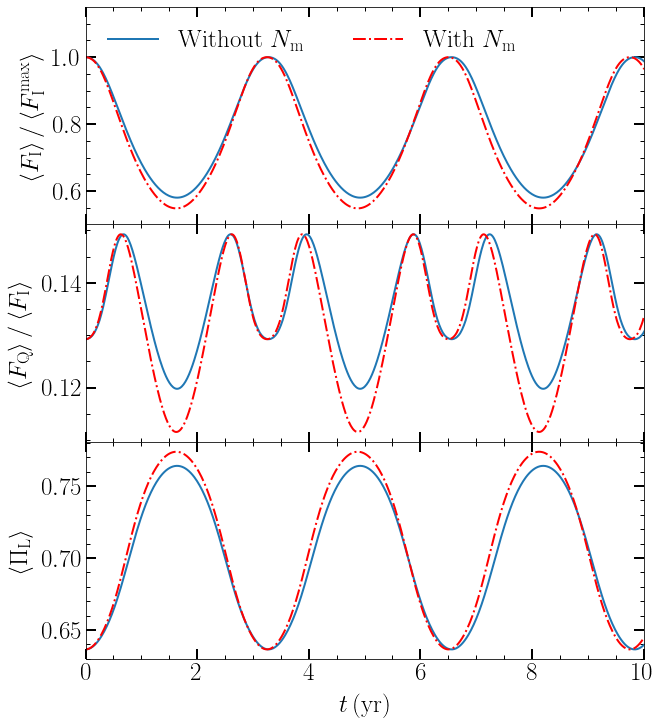

In [119]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter

def magnetic_inclination(t, theta, T, P, chi):

    psi=-2*pi/T*t+pi/2
    return np.arccos(np.sin(theta)*np.sin(psi)*np.sin(chi)+np.cos(theta)*np.cos(chi))

colors=['red','blue','green']
line=['solid','dashed','dashdot','dotted']
label=[r'$t=0$',r'$t=T/4$',r'$t=T/3$',r'$t=T/2$']





for j in range(1):
    data=np.genfromtxt('./B143kev.dat')
    
    theta_em=data[:,0]
    Ix=data[:,1]
    Io=data[:,2]
    
    data1=np.genfromtxt('./triaxial_alpha2.dat')
    t1=data1[:,0]
    alpha1=data1[:,1]
    
    Xmode=sp_interp1d(theta_em, Ix,fill_value=(Ix[0], 0),bounds_error=False)
    Omode=sp_interp1d(theta_em, Io,fill_value=(Io[0], 0),bounds_error=False)
    FAI=np.zeros(len(alpha1))
    FAQ=np.zeros(len(alpha1))
    FAU=np.zeros(len(alpha1))
    PAL=np.zeros(len(alpha1))
    
    for k in range(len(alpha1)):
    
        alpha=alpha1[k]
        i=radian(45)
        P=2
        omega=2*pi/P
        t=np.linspace(0,2,300)
        Phi=omega*t
        cosTheta=cos(i)*cos(alpha)+sin(i)*sin(alpha)*cos(Phi)
        Theta=np.arccos(cosTheta)
        theta=th2te(Theta)
        Ix1=np.zeros(theta.size)
        Io1=np.zeros(theta.size)
        
        for i in range(len(theta)):
            Ix1[i]=Xmode(theta[i])*cos(theta[i])
            Io1[i]=Omode(theta[i])*cos(theta[i])
            
        Psi=np.arctan2(sin(alpha)*sin(Phi), (-sin(i)*cos(alpha)+cos(i)*sin(alpha)*cos(Phi)))
        
        FI=(Ix1+Io1)
        
        FQ=(Io1-Ix1)*cos(2*Psi)
        
        FU=(Io1-Ix1)*sin(2*Psi)
        
        PL=(FQ**2+FU**2)**0.5/FI
        
        FAI[k]=integrate.simpson(FI, Phi)/2/pi
        FAQ[k]=integrate.simpson(FQ, Phi)/2/pi
        FAU[k]=integrate.simpson(FU, Phi)/2/pi
        PAL[k]=integrate.simpson(PL, Phi)/2/pi
        
        
    p=plt.get_cmap('plasma')
    fig,axs =plt.subplots(3,1, figsize=(10,12), gridspec_kw={'height_ratios': [1, 1,1]},sharex=True,sharey='row')
    plt.subplots_adjust(hspace=0.0)       
    axs[0].plot(t1/yr,FAI/max(FAI),linewidth=2,label=r'${\rm Without}\  N_{\rm m}$')
    axs[1].plot(t1/yr,FAQ/FAI,linewidth=2)
    axs[2].plot(t1/yr,PAL,linewidth=2)
#     axs[2].plot(Phi/pi*180,FU/FI)

# axs[0].legend(fontsize=25,frameon=False,ncol=2)
axs[0].set_ylabel(r'$\left \langle F_{\rm I}  \right \rangle/ \left \langle F_{\rm I}^{\rm max}  \right \rangle$',fontsize=25)
axs[1].set_ylabel(r'$ \left \langle F_{\rm Q} \right \rangle / \left \langle F_{\rm I} \right \rangle$',fontsize=25)
axs[2].set_ylabel(r'$ \left \langle \Pi_{\rm L} \right \rangle$',fontsize=25)
axs[2].set_xlabel(r'$t\,(\rm yr)$',fontsize=25)
axs[0].set_xlim(0,10)
axs[0].minorticks_on()
# axs[1].set_ylim(-1.1,1.1)
axs[1].minorticks_on()
# axs[2].set_ylim(0,0.95)
axs[2].minorticks_on()
# axs[2].set_xlabel(r'$\Phi_{\rm B}\,(\rm deg)$',fontsize=25) 
# fig.text(0.17, 0.9, r'$B=4\times 10^{13}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25) 
# fig.text(0.60, 0.9, r'$B=10^{14}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25)

# plt.savefig("../../paper/fig_stokes3.pdf", format='pdf', bbox_inches="tight")


for j in range(1):
    data=np.genfromtxt('./B143kev.dat')
    
    theta_em=data[:,0]
    Ix=data[:,1]
    Io=data[:,2]
    
    data1=np.genfromtxt('./triaxial_alpha2.dat')
    t1=data1[:,0]
    alpha1=data1[:,2]
    
    Xmode=sp_interp1d(theta_em, Ix,fill_value=(Ix[0], 0),bounds_error=False)
    Omode=sp_interp1d(theta_em, Io,fill_value=(Io[0], 0),bounds_error=False)
    FAI=np.zeros(len(alpha1))
    FAQ=np.zeros(len(alpha1))
    FAU=np.zeros(len(alpha1))
    PAL=np.zeros(len(alpha1))
    
    for k in range(len(alpha1)):
    
        alpha=alpha1[k]
        i=radian(45)
        P=2
        omega=2*pi/P
        t=np.linspace(0,2,300)
        Phi=omega*t
        cosTheta=cos(i)*cos(alpha)+sin(i)*sin(alpha)*cos(Phi)
        Theta=np.arccos(cosTheta)
        theta=th2te(Theta)
        Ix1=np.zeros(theta.size)
        Io1=np.zeros(theta.size)
        
        for i in range(len(theta)):
            Ix1[i]=Xmode(theta[i])*cos(theta[i])
            Io1[i]=Omode(theta[i])*cos(theta[i])
            
        Psi=np.arctan2(sin(alpha)*sin(Phi), (-sin(i)*cos(alpha)+cos(i)*sin(alpha)*cos(Phi)))
        
        FI=(Ix1+Io1)
        
        FQ=(Io1-Ix1)*cos(2*Psi)
        
        FU=(Io1-Ix1)*sin(2*Psi)
        
        PL=(FQ**2+FU**2)**0.5/FI
        
        FAI[k]=integrate.simpson(FI, Phi)/2/pi
        FAQ[k]=integrate.simpson(FQ, Phi)/2/pi
        FAU[k]=integrate.simpson(FU, Phi)/2/pi
        PAL[k]=integrate.simpson(PL, Phi)/2/pi
        
        
    
    axs[0].plot(t1/yr,FAI/max(FAI),linewidth=2,color='red',linestyle='dashdot',label=r'${\rm With}\ N_{\rm m}$')
    axs[1].plot(t1/yr,FAQ/FAI,linewidth=2,color='red',linestyle='dashdot')
    axs[2].plot(t1/yr,PAL,linewidth=2,color='red',linestyle='dashdot')
#     axs[2].plot(Phi/pi*180,FU/FI)

axs[0].legend(fontsize=25,frameon=False,ncol=2)
# axs[0].set_ylabel(r'$\left \langle F_{\rm I}  \right \rangle/ \left \langle F_{\rm I}^{\rm max}  \right \rangle$',fontsize=25)
# axs[1].set_ylabel(r'$ \left \langle F_{\rm Q} \right \rangle / \left \langle F_{\rm I} \right \rangle$',fontsize=25)
# axs[2].set_ylabel(r'$ \left \langle \Pi_{\rm L} \right \rangle$',fontsize=25)
# axs[2].set_xlabel(r'$t\,(\rm yr)$',fontsize=25)
# axs[0].set_xlim(0,3*T/yr)
# axs[0].minorticks_on()
axs[0].set_ylim(0.5,1.15)
axs[1].minorticks_on()
# axs[2].set_ylim(0,0.95)
axs[2].minorticks_on()
# axs[2].set_xlabel(r'$\Phi_{\rm B}\,(\rm deg)$',fontsize=25) 
# fig.text(0.17, 0.9, r'$B=4\times 10^{13}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25) 
# fig.text(0.60, 0.9, r'$B=10^{14}\,{\rm G}\quad T_{\rm eff}=5\times 10^{6}\,\rm K$' ,fontsize=25)

plt.savefig("../../paper/fig_stokes4.pdf", format='pdf', bbox_inches="tight")